# Information System Solutions and Design (2250)

# Assignment 3: Data Science Project

## Nushura Islam (s3796107)

## Phase 4: Improved model with selected features (rf classification)

# Importing libraries

In [1]:
# Library for pickling as pickled file needs to be read in this file
import joblib

# Iimporting collections for counting catgorical values
import collections

# Importing library for splitting the data into train and text sets
from sklearn.model_selection import train_test_split

# Model library
from sklearn.linear_model import LogisticRegression

# Scaling
from sklearn.preprocessing import StandardScaler

# label encoder
from sklearn.preprocessing import LabelEncoder

# Onehot encoding
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Importing the library KNeighborsClassifier for kNN classification 
from sklearn.neighbors import KNeighborsClassifier

# Importing RandomForestClassifier library for decision tree classification
from sklearn.ensemble import RandomForestClassifier

# Load the pickled data

In [2]:
# Loading the file while was pickled
personal_loan_df = joblib.load('personal_loan_cleaned.pkl')

# Checking if the right file has been choosen
personal_loan_df.head(20)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815.0,40.0,9.0,3.0,Graduate,60.0,0.0,yes,1.7,0,0,yes,0
1,5737.0,65.0,27.0,4.0,Advanced or Professional,36.0,90.0,no,0.0,0,0,yes,0
3,4734.0,29.0,14.0,1.0,Undergraduate,52.0,0.0,no,0.0,1,0,yes,0
4,2551.0,43.0,23.0,4.0,Graduate,33.0,0.0,no,0.0,0,0,yes,0
5,4491.0,44.0,18.0,3.0,Advanced or Professional,49.0,0.0,no,0.0,0,0,yes,0
6,706.0,42.0,16.0,4.0,Advanced or Professional,23.0,0.0,no,0.0,0,0,yes,0
7,5327.0,64.0,38.0,2.0,Undergraduate,112.0,0.0,no,0.0,0,0,no,0
8,5269.0,43.0,7.0,4.0,Graduate,28.0,83.0,yes,0.9,0,0,yes,0
9,1918.0,25.0,8.0,1.0,Undergraduate,47.0,0.0,no,0.0,0,0,no,0
11,4359.0,25.0,15.0,2.0,Advanced or Professional,40.0,0.0,no,0.0,0,0,yes,0


# 3. Split cleaned data into training and testing sets

In [3]:
# Selecting features according to feature_selection
feature_cols = [
    'income',
    'mortgage_amt',
    'credit_card_spend',
    'fixed_deposit_acct'
]

# Storing the feature_cols inside the X
# The variable is an uppercase letter as it is storing multiple features
X = personal_loan_df[feature_cols]

# Storing the personal_loan column in y
#  The variable is lowercase here, because its storing one variable
y = personal_loan_df['personal_loan']

# Splitting both X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,    # Splitting and assigning 20% of each X and y for testing
                                                    random_state = 2    # Passing an int for reproducible result
                                                    )

# Scaling continuous variables

Continuous variables which are being considered here are:
   - income
   - mortgage_amt

In [4]:
# Selecting columns to scale
columns_to_scale = [
    'income',
    'mortgage_amt'
]

# Making copy of the training and testing sets 
# As without making a copy, the original values 
# from the dataset will be changed, which is not wanted.
X_train = X_train.copy()
X_test = X_test.copy()

# Instantiating a scaler
scaler = StandardScaler()


# To access all the continuous variable columns, a loop is used
for col in columns_to_scale:
    # to check if the loop is addressing the right columns
    # print(col)
    
    # Fitting the scaler on the training column 
    # As the numpy array is in a 2D shape, it needs to be reshaped to a 1D shape. 
    # Hence, the reshape() method is being used to achieve that
    scaler.fit(X_train[col].values.reshape(-1, 1))
    
    # Now tranforming the training and testing columns.
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))
    
# Checking how the values look like in the transformed training and testing dataset
print(X_train.shape, X_test.shape)

(4290, 4) (1073, 4)


In [5]:
# Checking the X_train values for first five rows of training set
X_train.head()

,income,mortgage_amt,credit_card_spend,fixed_deposit_acct
5152,0.737300,0.865742,3.2,0
2820,-1.418797,-0.781218,3.9,0
4450,0.782692,-0.781218,0.0,0
2715,-0.374792,0.564009,2.5,0
210,0.079123,0.350281,3.7,0


In [6]:
# Check again but with X_test of testign set
X_test.head()

,income,mortgage_amt,credit_card_spend,fixed_deposit_acct
5882,-0.261313,0.978892,0.2,0
1205,0.011036,0.765165,0.5,0
3208,-0.964882,1.632648,0.0,0
2815,2.257916,0.450859,0.0,0
3482,0.737300,2.085248,0.7,0


# Discretization of continuous values

Variable which is being considered here are:
   - credit_card_spend

In [7]:
max(personal_loan_df['credit_card_spend'])

9.5

In [8]:
# The maximum credit card spent within the list is 9.5
# For credit card spending it makes more sense to categorise them as low, medium and high.
# low when spending is less than equal to 3
# medium when spending between 4-6
# high when spending ig greater than 6

def spending_category(df): 
    if df["credit_card_spend"] <= 3:
        return "low"
    elif (df["credit_card_spend"] > 3) & (df["credit_card_spend"] <= 6):
        return "medium"
    elif df["credit_card_spend"] > 6:
        return "high"

In [9]:
# Applying the spending_category function to the training set

# First, made a copy of the traing set
X_train = X_train.copy()

X_train["credit_card_spend_category"] = \
    X_train.apply(lambda X_train:spending_category(X_train), axis = 1) # axis=1 = row-wise

# The column "credit_card_spend" is no longer needed and hence can be deleted 
X_train.drop(['credit_card_spend'], axis=1, inplace=True)

# Check
X_train.head()

,income,mortgage_amt,fixed_deposit_acct,credit_card_spend_category
5152,0.737300,0.865742,0,medium
2820,-1.418797,-0.781218,0,medium
4450,0.782692,-0.781218,0,low
2715,-0.374792,0.564009,0,low
210,0.079123,0.350281,0,medium


In [10]:
# Applying the spending_category function to the testing set

# First, made a copy of the traing set
X_test = X_test.copy()

# The new column in X_test will be called credit_card_spend_category
X_test["credit_card_spend_category"] = \
    X_test.apply(lambda X_test:spending_category(X_test), axis = 1) # axis=1 = row-wise

# The column "credit_card_spend" is no longer needed and hence can be deleted 
X_test.drop(['credit_card_spend'], axis=1, inplace=True)

# Check
X_test.head()

,income,mortgage_amt,fixed_deposit_acct,credit_card_spend_category
5882,-0.261313,0.978892,0,low
1205,0.011036,0.765165,0,low
3208,-0.964882,1.632648,0,low
2815,2.257916,0.450859,0,low
3482,0.737300,2.085248,0,low


# OneHot encoding

Multi-label columns are:
- credit_card_spend_category

In [11]:
# credit_card_spend_category column which contains multi-label categorical vaeriables
columns_to_onehot_encode = [
    'credit_card_spend_category'
]

# Instantiating a one-hot encoder
enc = LabelBinarizer()

for col in columns_to_onehot_encode:
    # Transforming the training set
    # ccsc means to credit card spend category
    dummies_df = pd.get_dummies(X_train[col], prefix="ccsc") 
    X_train.drop([col], axis=1, inplace=True) # drop original column
    X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
    
    # Transforming the testing set
    dummies_df = pd.get_dummies(X_test[col], prefix="ccsc")
    X_test.drop([col], axis=1, inplace=True)
    X_test = pd.concat([X_test, dummies_df], axis=1)

In [12]:
# Check
X_train.head()

,income,mortgage_amt,fixed_deposit_acct,ccsc_high,ccsc_low,ccsc_medium
5152,0.737300,0.865742,0,0,0,1
2820,-1.418797,-0.781218,0,0,0,1
4450,0.782692,-0.781218,0,0,1,0
2715,-0.374792,0.564009,0,0,1,0
210,0.079123,0.350281,0,0,0,1


In [13]:
# Check
X_test.head()

,income,mortgage_amt,fixed_deposit_acct,ccsc_high,ccsc_low,ccsc_medium
5882,-0.261313,0.978892,0,0,1,0
1205,0.011036,0.765165,0,0,1,0
3208,-0.964882,1.632648,0,0,1,0
2815,2.257916,0.450859,0,0,1,0
3482,0.737300,2.085248,0,0,1,0


# Models using various classification algorithms

### Decision Trees (Random Forests)

In [16]:
# Library imported at the top of the notebook

# Instantiating model and fitting on training data
random_forest_model_two = RandomForestClassifier(n_estimators=15, criterion="entropy", max_features=4).fit(X_train, y_train)

# Predicting using test set
y_pred = random_forest_model_two.predict(X_test)

# Checking 
print(y_pred[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Initial Model Evaluation

### Confusion matrix

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"confusion matrix:\n {cf_matrix}")

confusion matrix:
 [[860  40]
 [ 74  99]]


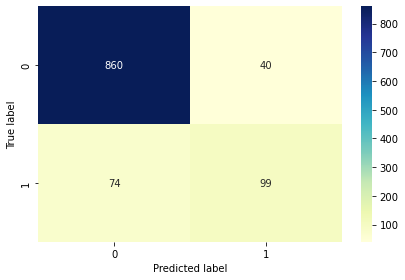

In [18]:
# Visualise the confusion matrix as a Seaborn Heatmap
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=True, cmap="YlGnBu")

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('confusion-matrix-initial.png', dpi=300) # dpi=300 is print quality

The result of the confusion metics suggests that based on the models created there are:
- 109cases True Positive cases 
- 874 cases of True Negative cases 
- 26 cases of False Positive cases
- 65 cases of False Negative cases 

### Recall

In [19]:
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

recall: 0.5722543352601156


The current model can successfully determine 57% of all people characteristics who are and who would be interested in taking a personal loan.

### Precision

In [20]:
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

precision: 0.7122302158273381


According to the calculation of precision, the model can successfully predict 80% times the, charecteristics of a person who will take personal loan. 

### F1 score

In [21]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.6346153846153846


The result of F1 score justifies that the model has low false positives and low false negatives. Thus, emphasiing more on the result of confusion matrix calculated previously.

In [22]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       900
           1       0.71      0.57      0.63       173

    accuracy                           0.89      1073
   macro avg       0.82      0.76      0.79      1073
weighted avg       0.89      0.89      0.89      1073



In [23]:
# Pickle the model for later evaluation
joblib.dump(random_forest_model_two, 'model-rf.pkl')  

# Also need to pickle the training and testing sets
joblib.dump(X_train, 'X_train_rf_two.pkl') 
joblib.dump(X_test, 'X_test_rf_two.pkl') 
joblib.dump(y_train, 'y_train_rf_two.pkl') 
joblib.dump(y_test, 'y_test_rf_two.pkl')

['y_test_rf_two.pkl']